# Statistics

In [1]:
from collections import Counter
import matplotlib.pyplot as plt

## Describing a Single Set of Data

In [2]:
num_friends = [100, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6,
               6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

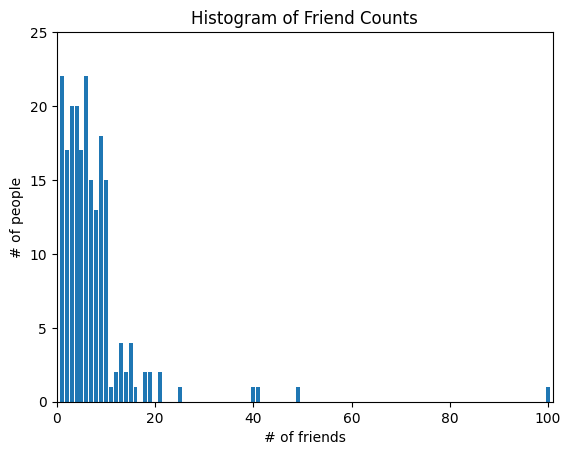

In [3]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [4]:
num_points = len(num_friends)
num_points

204

In [5]:
largest_value, smallest_value = max(num_friends), min(num_friends)
largest_value, smallest_value

(100, 1)

In [6]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]
smallest_value, second_smallest_value, second_largest_value

(1, 1, 49)

In [7]:
from ch05 import stat_mean
stat_mean(num_friends)

7.333333333333333

In [8]:
from ch05 import stat_median
assert stat_median([1, 10, 2, 9, 5]) == 5
assert stat_median([1, 9, 2, 10]) == (2 + 9) / 2

In [9]:
stat_median(num_friends)

6.0

In [10]:
from ch05 import stat_quantile
assert stat_quantile(num_friends, 0.10) == 1
assert stat_quantile(num_friends, 0.25) == 3
assert stat_quantile(num_friends, 0.75) == 9
assert stat_quantile(num_friends, 0.90) == 13

In [11]:
from ch05 import stat_mode
assert set(stat_mode(num_friends)) == {1, 6}

## Dispersion

In [12]:
from ch05 import data_range
assert data_range(num_friends) == 99

In [13]:
from ch05 import stat_variance
assert 81.54 < stat_variance(num_friends) < 81.55

In [14]:
from ch05 import standard_deviation
assert 9.02 < standard_deviation(num_friends) < 9.04

In [15]:
from ch05 import inter_quartile_range
assert inter_quartile_range(num_friends) == 6

## Correlation

In [16]:
daily_minutes = [1, 68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76, 54.01, 38.79, 47.59, 49.1, 27.66, 41.03, 36.73, 48.65, 28.12, 46.62, 35.57, 32.98, 35, 26.07, 23.77, 39.73, 40.57, 31.65, 31.21, 36.32, 20.45, 21.93, 26.02, 27.34, 23.49, 46.94, 30.5, 33.8, 24.23, 21.4, 27.94, 32.24, 40.57, 25.07, 19.42, 22.39, 18.42, 46.96, 23.72, 26.41, 26.97, 36.76, 40.32, 35.02, 29.47, 30.2, 31, 38.11, 38.18, 36.31, 21.03, 30.86, 36.07, 28.66, 29.08, 37.28, 15.28, 24.17, 22.31, 30.17, 25.53, 19.85, 35.37, 44.6, 17.23, 13.47, 26.33, 35.02, 32.09, 24.81, 19.33, 28.77, 24.26, 31.98, 25.73, 24.86, 16.28, 34.51, 15.23, 39.72, 40.8, 26.06, 35.76, 34.76, 16.13, 44.04, 18.03, 19.65, 32.62,
                 35.59, 39.43, 14.18, 35.24, 40.13, 41.82, 35.45, 36.07, 43.67, 24.61, 20.9, 21.9, 18.79, 27.61, 27.21, 26.61, 29.77, 20.59, 27.53, 13.82, 33.2, 25, 33.1, 36.65, 18.63, 14.87, 22.2, 36.81, 25.53, 24.62, 26.25, 18.21, 28.08, 19.42, 29.79, 32.8, 35.99, 28.32, 27.79, 35.88, 29.06, 36.28, 14.1, 36.63, 37.49, 26.9, 18.58, 38.48, 24.48, 18.95, 33.55, 14.24, 29.04, 32.51, 25.63, 22.22, 19, 32.73, 15.16, 13.9, 27.2, 32.01, 29.27, 33, 13.74, 20.42, 27.32, 18.23, 35.35, 28.48, 9.08, 24.62, 20.12, 35.26, 19.92, 31.02, 16.49, 12.16, 30.7, 31.22, 34.65, 13.13, 27.51, 33.2, 31.57, 14.1, 33.42, 17.44, 10.12, 24.42, 9.82, 23.39, 30.93, 15.03, 21.67, 31.09, 33.29, 22.61, 26.89, 23.48, 8.38, 27.81, 32.35, 23.84]
daily_hours = [dm / 60 for dm in daily_minutes]

In [17]:
from ch05 import stat_covariance
assert 22.42 < stat_covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < stat_covariance(num_friends, daily_hours) < 22.43 / 60

In [19]:
from ch05 import correlation
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

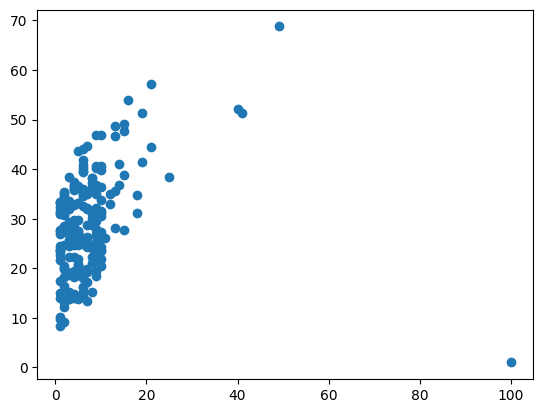

In [20]:
plt.scatter(num_friends, daily_minutes)
plt.show()

In [21]:
outlier = num_friends.index(100)
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]
daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [22]:
assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

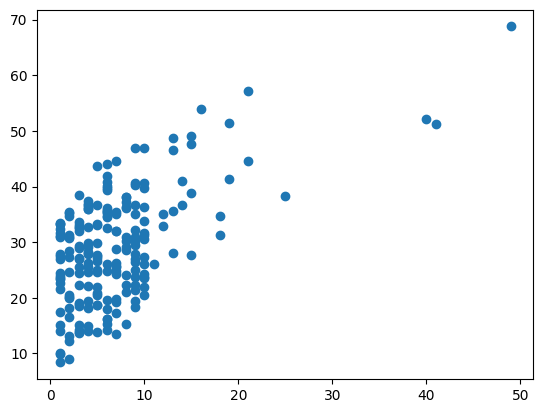

In [23]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.show()

## Simpson’s Paradox

## Some Other Correlational Caveats

In [25]:
x = [-2, -1, 0, 1, 2]
y = [ 2, 1, 0, 1, 2]

correlation(x, y)

0.0

In [26]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
correlation(x, y)

1.0